In [1]:
import pandas as pd 
import numpy as np 
from bs4 import BeautifulSoup 
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url=requests.get('https://www.worldometers.info/world-population/population-by-country/')
url

<Response [200]>

## Scraping Data using BeautifulSoup

In [3]:
soup=BeautifulSoup(url.text, 'lxml')

In [4]:
# Getting headers from the table
titles=[]
for i in soup.find_all('th'):
    title=i.text
    titles.append(title)
    
print(titles)

# Creating DataFrame 
df2=pd.DataFrame(columns=titles)

['#', 'Country (or dependency)', 'Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share']


In [5]:
# Extracting all the rows and columns data.
rows=soup.find_all('tr')

for i in rows[1:]:
    data=i.find_all('td')
    row=[tr.text for tr in data]
    l=len(df2)
    df2.loc[l]=row
    
print(df2)

       # Country (or dependency) Population (2020) Yearly Change  Net Change  \
0      1                   China     1,439,323,776        0.39 %   5,540,090   
1      2                   India     1,380,004,385        0.99 %  13,586,631   
2      3           United States       331,002,651        0.59 %   1,937,734   
3      4               Indonesia       273,523,615        1.07 %   2,898,047   
4      5                Pakistan       220,892,340        2.00 %   4,327,022   
..   ...                     ...               ...           ...         ...   
230  231              Montserrat             4,992        0.06 %           3   
231  232        Falkland Islands             3,480        3.05 %         103   
232  233                    Niue             1,626        0.68 %          11   
233  234                 Tokelau             1,357        1.27 %          17   
234  235                Holy See               801        0.25 %           2   

    Density (P/Km²) Land Area (Km²) Mig

In [6]:
df2.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [7]:
df2.rename({'Country (or dependency)':'Country'},axis=1, inplace=True)

In [8]:
df2.shape

(235, 12)

### Importing a csv file

In [9]:
import os
os.chdir(r'C:\Users\RAJAT SINGH\Downloads\world population')

# Calling a csv file from the system
df1=pd.read_csv('data.csv')

In [10]:
df1.head()

,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,rank
0,356,696828385.0,1.059634e+09,1.240614e+09,1.417173e+09,1.428628e+09,1.514994e+09,1.670491e+09,India,3287590.0,2973190.0,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,1
1,156,982372466.0,1.264099e+09,1.348191e+09,1.425887e+09,1.425671e+09,1.415606e+09,1.312636e+09,China,9706961.0,9424702.9,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,2
2,840,223140018.0,2.823986e+08,3.111828e+08,3.382899e+08,3.399966e+08,3.521623e+08,3.753920e+08,United States,9372610.0,9147420.0,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,3
3,360,148177096.0,2.140724e+08,2.440162e+08,2.755013e+08,2.775341e+08,2.921501e+08,3.172252e+08,Indonesia,1904569.0,1877519.0,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,4
4,586,80624057.0,1.543699e+08,1.944545e+08,2.358249e+08,2.404857e+08,2.740298e+08,3.678085e+08,Pakistan,881912.0,770880.0,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,5


In [11]:
df1.rename({'country':'Country'},axis=1, inplace=True)

### Merging both the dataframes

In [12]:
# Merging both the DataFrames
df=df2.merge(df1, on='Country')

In [13]:
df.head(2)

,#,Country,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,...,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,rank
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,...,9706961.0,9424702.9,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,2
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,...,3287590.0,2973190.0,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,1


## EDA

In [14]:
# Dropping the columns 
df.drop(columns=['place','area','landAreaKm','cca2','cca3','density','densityMi','rank','World Share','Migrants (net)','netChange','Urban Pop %'], inplace=True)

In [15]:
# Renaming the columns
df.rename({ 'Yearly Change':'Yearly Change(%)','worldPercentage':'World Share(%)','Density (P/Km²)':'Density(2022)','pop1980':'Population (1980)','pop2000':'Population (2000)','pop2010':'Population (2010)','pop2022':'Population (2022)','pop2023':'Population (2023)','pop2030':'Population (2030)','pop2050':'Population (2050)', 'growthRate':'Growth Rate'},axis=1, inplace=True)

In [16]:
df.head(2)

,#,Country,Population (2020),Yearly Change(%),Net Change,Density(2022),Land Area (Km²),Fert. Rate,Med. Age,Population (1980),Population (2000),Population (2010),Population (2022),Population (2023),Population (2030),Population (2050),Growth Rate,World Share(%)
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211",1.7,38,982372466.0,1.264099e+09,1.348191e+09,1.425887e+09,1.425671e+09,1.415606e+09,1.312636e+09,-0.0002,0.1781
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190",2.2,28,696828385.0,1.059634e+09,1.240614e+09,1.417173e+09,1.428628e+09,1.514994e+09,1.670491e+09,0.0081,0.1785


In [17]:
# Knowing the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #                  214 non-null    object 
 1   Country            214 non-null    object 
 2   Population (2020)  214 non-null    object 
 3   Yearly Change(%)   214 non-null    object 
 4   Net Change         214 non-null    object 
 5   Density(2022)      214 non-null    object 
 6   Land Area (Km²)    214 non-null    object 
 7   Fert. Rate         214 non-null    object 
 8   Med. Age           214 non-null    object 
 9   Population (1980)  214 non-null    float64
 10  Population (2000)  214 non-null    float64
 11  Population (2010)  214 non-null    float64
 12  Population (2022)  214 non-null    float64
 13  Population (2023)  214 non-null    float64
 14  Population (2030)  214 non-null    float64
 15  Population (2050)  214 non-null    float64
 16  Growth Rate        214 non

In [18]:
# finding any null values
df.isnull().sum()

#                    0
Country              0
Population (2020)    0
Yearly Change(%)     0
Net Change           0
Density(2022)        0
Land Area (Km²)      0
Fert. Rate           0
Med. Age             0
Population (1980)    0
Population (2000)    0
Population (2010)    0
Population (2022)    0
Population (2023)    0
Population (2030)    0
Population (2050)    0
Growth Rate          0
World Share(%)       4
dtype: int64

In [19]:
# finding unique values 
df['Density(2022)'].unique()

array(['153', '464', '36', '151', '287', '25', '226', '1,265', '9', '66',
       '347', '115', '368', '103', '314', '40', '110', '52', '240', '137',
       '281', '119', '206', '67', '49', '83', '94', '527', '46', '229',
       '17', '18', '75', '93', '60', '124', '4', '16', '79', '26', '99',
       '56', '203', '32', '48', '214', '3', '19', '673', '341', '76',
       '84', '7', '167', '71', '95', '508', '87', '13', '38', '53', '525',
       '108', '463', '11', '383', '414', '106', '225', '81', '111', '123',
       '89', '118', '107', '68', '47', '109', '20', '100', '400', '219',
       '152', '7,140', '64', '667', '55', '34', '313', '8,358', '114',
       '15', '72', '8', '5', '58', '73', '57', '35', '2', '104', '273',
       '248', '105', '323', '43', '239', '70', '30', '2,239', '50', '31',
       '626', '131', '467', '242', '784', '1,802', '1,380', '237', '39',
       '354', '668', '77', '728', '301', '147', '331', '593', '223',
       '149', '164', '96', '274', '1,246', '329', '125

In [20]:
# Replacing the comma's and space from the columns for better visualization.

df['Population (2020)']=df['Population (2020)'].str.replace(',', '')

df['Net Change']=df['Net Change'].str.replace(',', '')

df['Land Area (Km²)']=df['Land Area (Km²)'].str.replace(',', '')
df['Land Area (Km²)']=df['Land Area (Km²)'].str.replace(' ', '')

df['Yearly Change(%)']=df['Yearly Change(%)'].str.replace('%','')
df['Yearly Change(%)']=df['Yearly Change(%)'].str.replace(' ','')

df['Density(2022)']=df['Density(2022)'].str.replace(',', '')
df['Density(2022)']=df['Density(2022)'].str.replace(' ', '')

In [21]:
print(df['Med. Age'].unique())

# Finding the NA values in the dataset
df[df['Med. Age']=='N.A.']

['38' '28' '30' '23' '33' '18' '40' '29' '48' '19' '26' '25' '32' '17'
 '46' '42' '47' '20' '44' '31' '45' '41' '21' '22' '35' '15' '34' '16'
 '43' '24' '27' '37' '36' '39' 'N.A.']


,#,Country,Population (2020),Yearly Change(%),Net Change,Density(2022),Land Area (Km²),Fert. Rate,Med. Age,Population (1980),Population (2000),Population (2010),Population (2022),Population (2023),Population (2030),Population (2050),Growth Rate,World Share(%)
188,202,Isle of Man,85033,0.53,449,149,570,N.A.,N.A.,64022.0,75562.0,83828.0,84519.0,84710.0,85798.0,86680.0,0.0023,0.0
189,203,Andorra,77265,0.16,123,164,470,N.A.,N.A.,35611.0,66097.0,71519.0,79824.0,80088.0,81528.0,80504.0,0.0033,0.0
190,204,Dominica,71986,0.25,178,96,750,N.A.,N.A.,72978.0,68346.0,68755.0,72737.0,73040.0,74988.0,74167.0,0.0042,0.0
191,205,Cayman Islands,65722,1.19,774,274,240,N.A.,N.A.,17100.0,39658.0,54074.0,68706.0,69310.0,72865.0,77633.0,0.0088,0.0
192,206,Bermuda,62278,-0.36,-228,1246,50,N.A.,N.A.,53565.0,61371.0,63447.0,64184.0,64069.0,62806.0,56041.0,-0.0018,0.0
193,207,Marshall Islands,59190,0.68,399,329,180,N.A.,N.A.,31988.0,54224.0,53416.0,41569.0,41996.0,44733.0,51211.0,0.0103,0.0
194,208,Northern Mariana Islands,57559,0.60,343,125,460,N.A.,N.A.,17613.0,80338.0,54087.0,49551.0,49796.0,51178.0,50050.0,0.0049,0.0
195,209,Greenland,56770,0.17,98,0,410450,N.A.,N.A.,50106.0,56184.0,56351.0,56466.0,56643.0,57152.0,53997.0,0.0031,0.0
196,210,American Samoa,55191,-0.22,-121,276,200,N.A.,N.A.,32886.0,58230.0,54849.0,44273.0,43914.0,41142.0,33557.0,-0.0081,0.0
197,213,Sint Maarten,42876,1.15,488,1261,34,N.A.,N.A.,12243.0,30489.0,33034.0,44175.0,44222.0,44946.0,38947.0,0.0011,0.0


In [22]:
# Replacing the NA values with 0.
df.replace('N.A.', 0, inplace=True)

print(df['Med. Age'].unique())

['38' '28' '30' '23' '33' '18' '40' '29' '48' '19' '26' '25' '32' '17'
 '46' '42' '47' '20' '44' '31' '45' '41' '21' '22' '35' '15' '34' '16'
 '43' '24' '27' '37' '36' '39' 0]


In [23]:
df['Fert. Rate'].unique()

array(['1.7', '2.2', '1.8', '2.3', '3.6', '5.4', '2.1', '1.4', '4.3',
       '2.6', '3.3', '6.0', '1.6', '1.5', '1.9', '1.3', '4.9', '2.4',
       '3.5', '1.1', '5.0', '3.1', '4.4', '3.7', '4.6', '5.6', '2.0',
       '3.9', '3.8', '4.1', '7.0', '1.2', '5.2', '5.9', '2.8', '4.7',
       '2.9', '2.5', '5.8', '6.1', '5.5', '3.0', '2.7', '4.8', '3.4',
       '5.3', '4.0', '3.2', '4.5', '4.2', 0], dtype=object)

In [24]:
# Changing the Data types
df=df.astype({'Population (2020)':'int64','Yearly Change(%)':'float','Net Change':'int64','Density(2022)':'int64','Land Area (Km²)':'int64','Fert. Rate':'float64','Med. Age':'int64','World Share(%)':'float64','Population (2000)':'int64','Population (2010)':'int64','Population (2022)':'int64','Population (2023)':'int64','Population (2030)':'int64','Population (2050)':'int64'})

In [25]:
# Checking the Data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #                  214 non-null    object 
 1   Country            214 non-null    object 
 2   Population (2020)  214 non-null    int64  
 3   Yearly Change(%)   214 non-null    float64
 4   Net Change         214 non-null    int64  
 5   Density(2022)      214 non-null    int64  
 6   Land Area (Km²)    214 non-null    int64  
 7   Fert. Rate         214 non-null    float64
 8   Med. Age           214 non-null    int64  
 9   Population (1980)  214 non-null    float64
 10  Population (2000)  214 non-null    int64  
 11  Population (2010)  214 non-null    int64  
 12  Population (2022)  214 non-null    int64  
 13  Population (2023)  214 non-null    int64  
 14  Population (2030)  214 non-null    int64  
 15  Population (2050)  214 non-null    int64  
 16  Growth Rate        214 non

In [26]:
# Rearranging the columns
df=df[['Country','Population (1980)','Population (2000)','Population (2010)','Population (2020)','Population (2022)','Population (2023)','Population (2030)','Population (2050)','Yearly Change(%)','Net Change','Density(2022)','Land Area (Km²)','Fert. Rate','Med. Age','World Share(%)']]

In [27]:
# Creating a new column for density of rest of the population
df['Density(1980)']=round(df['Population (1980)'] / df['Land Area (Km²)'])
df['Density(2000)']=round(df['Population (2000)'] / df['Land Area (Km²)'])
df['Density(2010)']=round(df['Population (2010)'] / df['Land Area (Km²)'])
df['Density(2020)']=round(df['Population (2020)'] / df['Land Area (Km²)'])

In [28]:
# Converting the World Share from decimal to percentage
df['World Share(%)']=df['World Share(%)'].apply(lambda x:x*100)

In [29]:
df.head()

,Country,Population (1980),Population (2000),Population (2010),Population (2020),Population (2022),Population (2023),Population (2030),Population (2050),Yearly Change(%),Net Change,Density(2022),Land Area (Km²),Fert. Rate,Med. Age,World Share(%),Density(1980),Density(2000),Density(2010),Density(2020)
0,China,982372466.0,1264099069,1348191368,1439323776,1425887337,1425671352,1415605906,1312636325,0.39,5540090,153,9388211,1.7,38,17.81,105.0,135.0,144.0,153.0
1,India,696828385.0,1059633675,1240613620,1380004385,1417173173,1428627663,1514994080,1670490596,0.99,13586631,464,2973190,2.2,28,17.85,234.0,356.0,417.0,464.0
2,United States,223140018.0,282398554,311182845,331002651,338289857,339996563,352162301,375391963,0.59,1937734,36,9147420,1.8,38,4.25,24.0,31.0,34.0,36.0
3,Indonesia,148177096.0,214072421,244016173,273523615,275501339,277534122,292150100,317225213,1.07,2898047,151,1811570,2.3,30,3.47,82.0,118.0,135.0,151.0
4,Pakistan,80624057.0,154369924,194454498,220892340,235824862,240485658,274029836,367808468,2.00,4327022,287,770880,3.6,23,3.00,105.0,200.0,252.0,287.0


## Data Visualization

### Countries with largest landmass

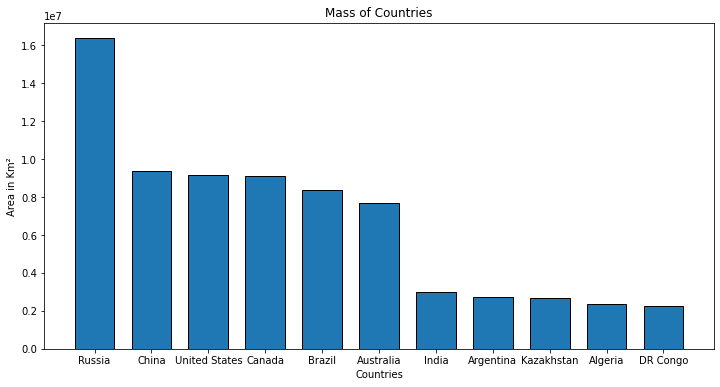

In [30]:
la=df.groupby('Country')['Land Area (Km²)'].sum().nlargest(11)
la

plt.figure(figsize=(12,6))
plt.bar(la.index, la, edgecolor='k', width=0.7)
plt.xlabel('Countries')
plt.ylabel('Area in Km²')
plt.title('Mass of Countries')
plt.show()

### Population growth between multiple countries

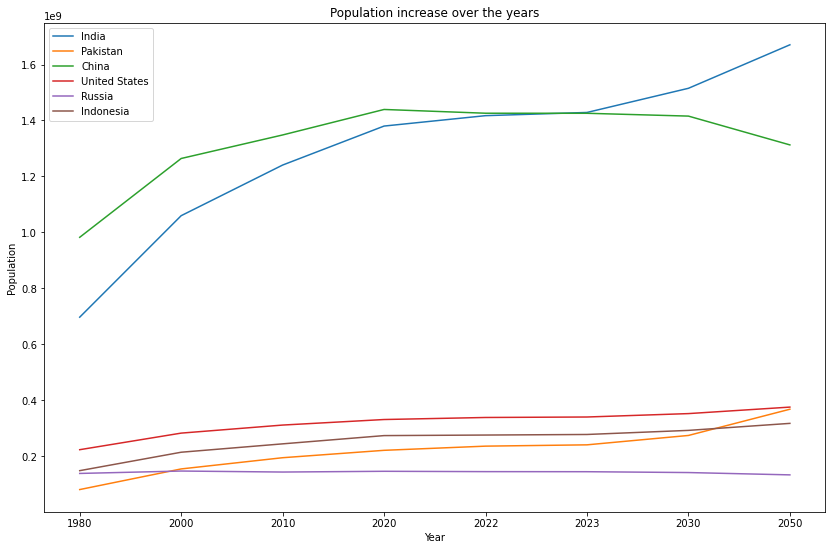

In [31]:
fig, ax = plt.subplots()

fig.set_size_inches(14, 9)

# List of countries to plot
countries = ['India', 'Pakistan', 'China', 'United States', 'Russia', 'Indonesia']

# Loop through countries and plot population growth data for each country
for country in countries:
    country_df = df.loc[df['Country'] == country]
    country_growth = country_df[['Population (1980)','Population (2000)','Population (2010)','Population (2020)','Population (2022)','Population (2023)','Population (2030)','Population (2050)']].values.tolist()[0]
    ax.plot(country_growth, label=country)

ax.set_title('Population increase over the years')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_xticks(range(len(country_growth)))
ax.set_xticklabels([1980,2000,2010,2020,2022,2023,2030,2050])

ax.legend()
plt.show()

### Population over the years 

In [32]:
df_cols=df[['Country','Population (1980)', 'Population (2000)','Population (2010)','Population (2020)','Population (2022)',
            'Population (2023)','Population (2030)','Population (2050)']]


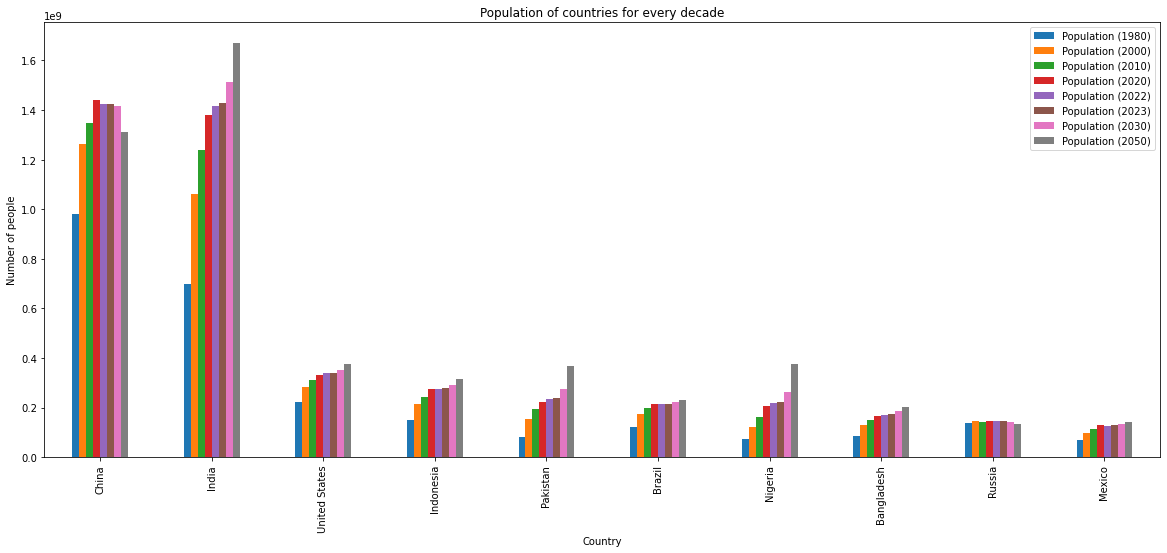

In [33]:
df_cols[0:10].plot(x='Country',kind='bar', figsize=(20,8))
plt.ylabel('Number of people')
plt.title('Population of countries for every decade')
plt.show()

# Here, it can be seen by 2050, India's population will far surpassed any of the world countries , whereas China which is currently equal to us in respect of population , will decrease in population.

### Most densed Countries in 2022

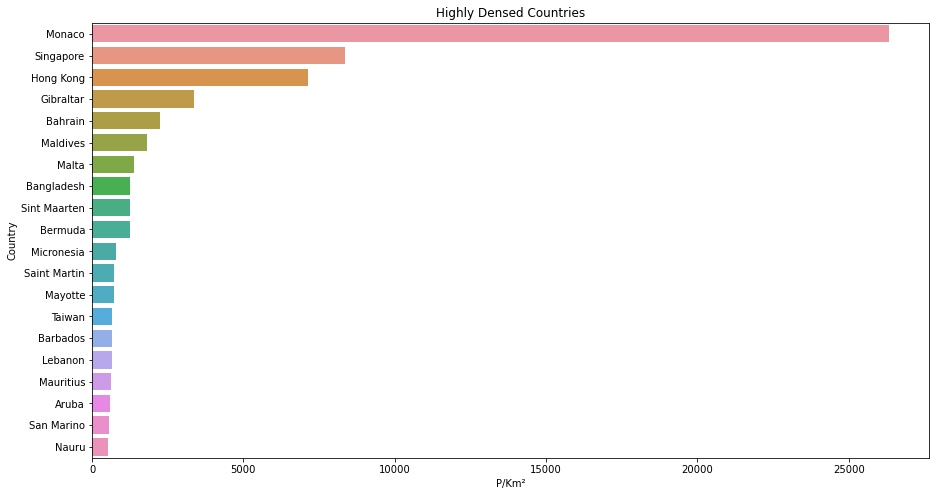

In [34]:
dc=df.groupby('Country')['Density(2022)'].sum().nlargest(20)

plt.figure(figsize=(15,8))
sns.barplot(x=dc, y=dc.index)
plt.xlabel('P/Km²')
plt.title('Highly Densed Countries')
plt.show()

### Density over the years 

In [35]:
df_density=df[['Country','Density(1980)','Density(2000)','Density(2020)','Density(2022)']]
df_density

,Country,Density(1980),Density(2000),Density(2020),Density(2022)
0,China,105.0,135.0,153.0,153
1,India,234.0,356.0,464.0,464
2,United States,24.0,31.0,36.0,36
3,Indonesia,82.0,118.0,151.0,151
4,Pakistan,105.0,200.0,287.0,287
...,...,...,...,...,...
209,Saint Barthelemy,142.0,337.0,470.0,470
210,Montserrat,115.0,51.0,50.0,50
211,Falkland Islands,0.0,0.0,0.0,0
212,Niue,14.0,8.0,6.0,6


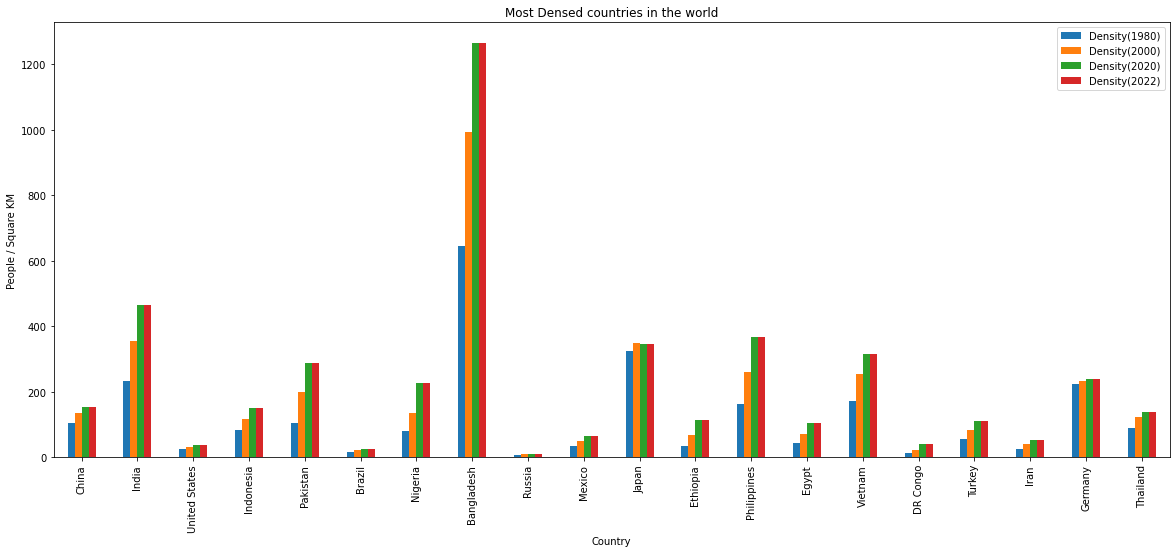

In [36]:
df_density[0:20].plot(x='Country',kind='bar', figsize=(20,8))
plt.ylabel('People / Square KM')
plt.title('Most Densed countries in the world')
plt.show()

### Population w.r.t other Countries

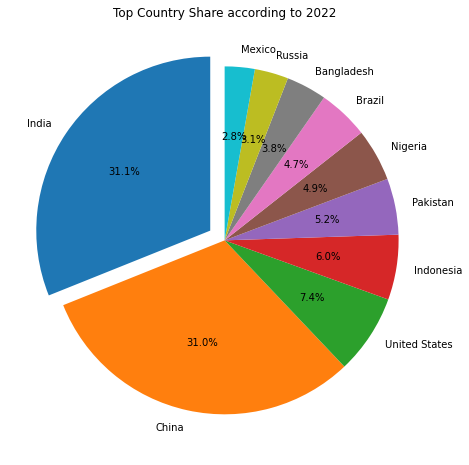

In [37]:
# Selecting the largest share countries
ws = df.groupby('Country')['World Share(%)'].sum().nlargest(10)

explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Plotting a Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))      
ax.pie(ws, labels=ws.index, autopct='%1.1f%%', explode=explode, startangle=90)
ax.set_title('Top Country Share according to 2022')
plt.show()

### Multiple factors affecting in Population

In [38]:
tt=df.groupby('Country')['Density(2022)',('Yearly Change(%)'),('Fert. Rate')].sum()

C:\Users\RAJAT SINGH\AppData\Local\Temp\ipykernel_10228\1287038998.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tt=df.groupby('Country')['Density(2022)',('Yearly Change(%)'),('Fert. Rate')].sum()


Text(0.5, 0, 'Fertitliy Rate')

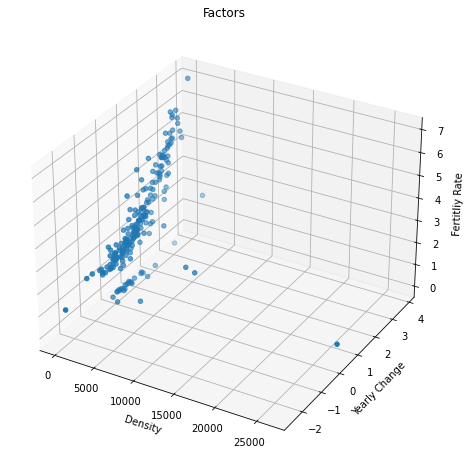

In [39]:
fig=plt.figure(figsize=(12,8))

ax=plt.subplot(projection='3d')

ax.scatter3D(tt['Density(2022)'], tt['Yearly Change(%)'], tt['Fert. Rate'])
ax.set_title('Factors')
ax.set_xlabel('Density')
ax.set_ylabel('Yearly Change')
ax.set_zlabel('Fertitliy Rate')

### Fertility Rate of various Countries

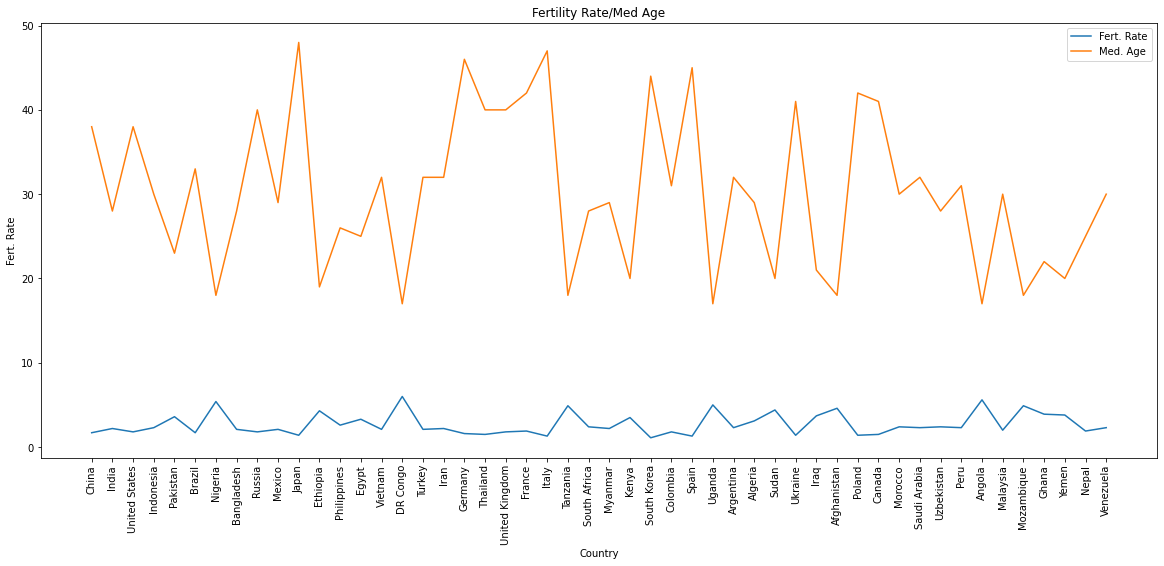

In [40]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df['Country'][0:50], y=df['Fert. Rate'], data=df, label='Fert. Rate')
sns.lineplot(x=df['Country'][0:50], y=df['Med. Age'], data=df, label='Med. Age')
plt.title('Fertility Rate/Med Age')
plt.xticks(rotation='vertical')
plt.show()

### Highest Fertility rate 

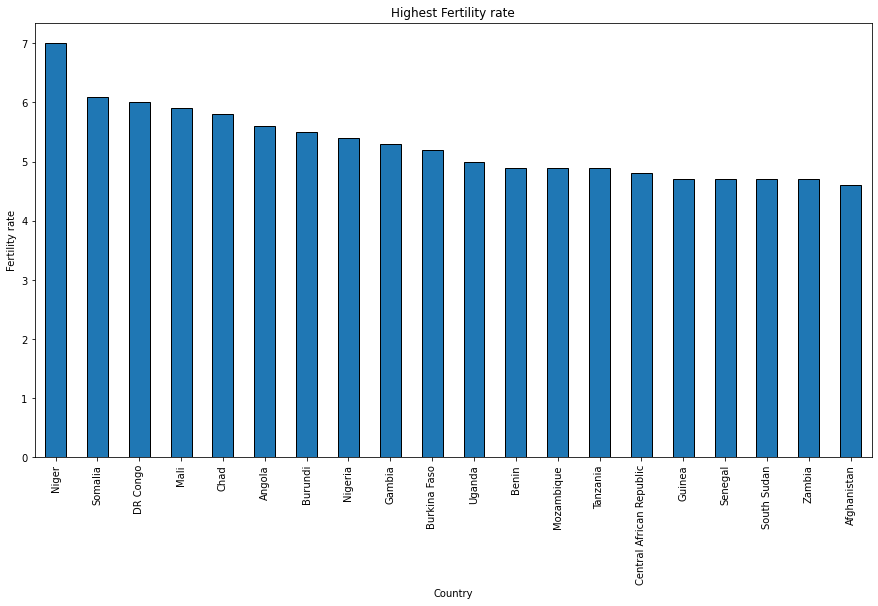

In [41]:
df.groupby('Country')['Fert. Rate'].sum().nlargest(20).plot(kind='bar', figsize=(15,8), edgecolor='k', width=0.5)
plt.ylabel('Fertility rate')
plt.title('Highest Fertility rate')
plt.show()

In [42]:
# Until 2020, China was the most populous country in the world but in 2022 and even after that India has become the world most populous country and it will a increase in rise in population whereas China will see decline in population.
# The population is China is predicted to decrease for the next decades, where as India's population will be on rise.
# The fertility rate of the women of african subcontinent is higher than any other country in the world.
# Many countries whose fertility rate are higher, it can been seen that women tend to marry at a younger age. 
# Morocco is the most densed region in the world as morocco is also called as the heaven for the rich.
